In [1]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
import numpy as np
from scipy import sparse
import torch

478


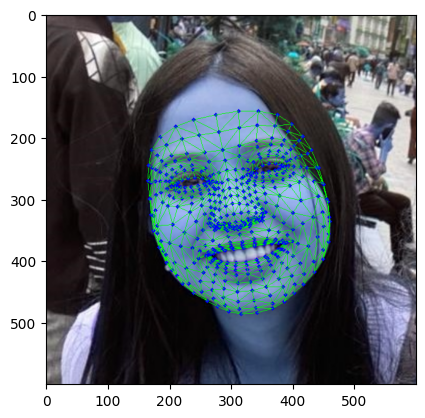

In [2]:

# Importing Image
# image=img
image=cv2.imread("./test_images/rizuwana.jpg")
image=cv2.resize(image,(600,600))
annoted_image=image.astype(np.uint8)
# print(image)
# Fetching Edge List
mp_face_mesh=mp.solutions.face_mesh
connection_tesselation=mp_face_mesh.FACEMESH_TESSELATION
# print(connection_tesselation)

# Fetching Land Marks ( Nodes )
with mp_face_mesh.FaceMesh(static_image_mode=False,max_num_faces=2,refine_landmarks=True,min_detection_confidence=0.5) as face_mesh:
    results=face_mesh.process(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
# print_face_mesh(results.multi_face_landmarks) 

# Making Seperate List For X-axis & Y-axis of Nodes
x_axis=np.empty(len(results.multi_face_landmarks[0].landmark))
y_axis=np.empty(len(results.multi_face_landmarks[0].landmark))
i=0

for nodes in results.multi_face_landmarks[0].landmark:
    x_axis[i]=(results.multi_face_landmarks[0].landmark[i].x)
    y_axis[i]=(results.multi_face_landmarks[0].landmark[i].y)
    i=i+1
print(len(results.multi_face_landmarks[0].landmark))
# for axis in range(0,len(x_axis)):
#     print(x_axis[axis],y_axis[axis],"\n")

# Generating Feature Matrix
FEATURE_MATRIX=np.zeros((468,468))
for i in range(468):
    FEATURE_MATRIX[i][i]=1

WEIGHTED_ADJACENCY_MATRIX=np.zeros((468,468)) #creating a numpy array of shape 468X468 initialized with zero
BINARY_ADJACENCY_MATRIX=np.zeros((468,468))

for edge in connection_tesselation:
    # Determining X & Y axis of Two Connected Points
    x1=x_axis[edge[0]]
    y1=y_axis[edge[0]]
    x2=x_axis[edge[1]]
    y2=y_axis[edge[1]]
    # Calculating Eucleadin Distance for Weighted Graph
    eucleadian_distance=(((x2-x1)**2 + (y2-y1)**2 ) ** 0.5)
    # Creating Weighted Graph
    WEIGHTED_ADJACENCY_MATRIX[edge[0]][edge[1]]=eucleadian_distance
    WEIGHTED_ADJACENCY_MATRIX[edge[1]][edge[0]]=eucleadian_distance

    BINARY_ADJACENCY_MATRIX[edge[0]][edge[1]]=1
    BINARY_ADJACENCY_MATRIX[edge[1]][edge[0]]=1
    # Normalizing axis Values For Visualizing Meash on Face
    shape = image.shape 
    relative_x = int(x1 * shape[1])
    relative_y = int(y1 * shape[0])
    relative_z = int(x2 * shape[1])   
    relative_c = int(y2 * shape[0])
    # Drawing Nodes and Edges on Image For Visualization
    cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 0, 255), thickness=3) 
    cv2.line(image,(relative_x,relative_y),(relative_z,relative_c),(0,255,0),1)

plt.imshow(image)
WEIGHTED_ADJACENCY_MATRIX=sparse.csr_matrix(WEIGHTED_ADJACENCY_MATRIX)
BINARY_ADJACENCY_MATRIX=sparse.csr_matrix(BINARY_ADJACENCY_MATRIX)
FEATURE_MATRIX=torch.from_numpy(FEATURE_MATRIX)
# print(WEIGHTED_ADJACENCY_MATRIX)
# print(BINARY_ADJACENCY_MATRIX)
# print(FEATURE_MATRIX)
# np.savetxt("firstarray2.csv", WEIGHTED_ADJACENCY_MATRIX, delimiter=",")


In [3]:
import import_ipynb
from train import gae_for
gae_for(WEIGHTED_ADJACENCY_MATRIX,FEATURE_MATRIX)

importing Jupyter notebook from train.ipynb
Epoch: 0001 train_loss= 1.74389 val_ap= 0.75111 time= 0.02394
Epoch: 0002 train_loss= 1.63948 val_ap= 0.69721 time= 0.02194
Epoch: 0003 train_loss= 1.67925 val_ap= 0.66416 time= 0.02895
Epoch: 0004 train_loss= 1.67585 val_ap= 0.64362 time= 0.02490
Epoch: 0005 train_loss= 1.68683 val_ap= 0.62051 time= 0.02693
Epoch: 0006 train_loss= 1.53807 val_ap= 0.59939 time= 0.02194
Epoch: 0007 train_loss= 1.60598 val_ap= 0.58606 time= 0.01995
Epoch: 0008 train_loss= 1.53653 val_ap= 0.57279 time= 0.01895
Epoch: 0009 train_loss= 1.45211 val_ap= 0.56957 time= 0.01895
Epoch: 0010 train_loss= 1.50311 val_ap= 0.56850 time= 0.01994
Epoch: 0011 train_loss= 1.40318 val_ap= 0.56750 time= 0.02394
Epoch: 0012 train_loss= 1.30240 val_ap= 0.56226 time= 0.02094
Epoch: 0013 train_loss= 1.25346 val_ap= 0.56117 time= 0.02094
Epoch: 0014 train_loss= 1.21947 val_ap= 0.55960 time= 0.02394
Epoch: 0015 train_loss= 1.18768 val_ap= 0.56953 time= 0.02397
Epoch: 0016 train_loss= 1.